In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/refined_projects/House-Price-Predictor/data/train.csv')
df_v = pd.read_csv('C:/Users/Lenovo/Desktop/refined_projects/House-Price-Predictor/data/validation.csv')
df_t = pd.read_csv('C:/Users/Lenovo/Desktop/refined_projects/House-Price-Predictor/data/test.csv')


Categorical value handling

In [64]:
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features = [feature for feature in categorical_features if feature != 'furnishingstatus']
print(categorical_features)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [65]:
binary_mapping = {'yes':1, 'no':0}
df_names = [df, df_v, df_t]

for df_name in df_names:
    for feature in categorical_features:
        df_name[feature] = df_name[feature].map(binary_mapping)

In [66]:
#ordinal encoding for furnishingstatus
furnishing_mapping = {"unfurnished": 0, "semi-furnished": 1, "furnished": 2}
for df_name in df_names:
    df_name["furnishingstatus"] = df_name["furnishingstatus"].map(furnishing_mapping)

In [67]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,1,1,0,0,0,2,0,1,5250000
1,6540,4,2,2,1,1,1,0,1,2,1,2,8540000
2,3520,2,1,2,1,0,0,0,0,0,1,2,4515000
3,8250,3,1,1,1,0,0,0,0,0,0,2,4480000
4,3180,4,1,2,1,0,1,0,1,0,0,0,3290000


<Axes: >

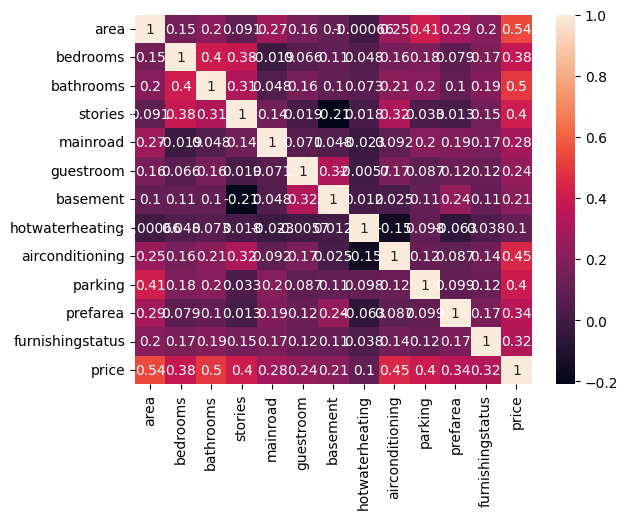

In [68]:
sns.heatmap(df.corr(), annot=True)

In [69]:
for df_name in df_names:
    df_name['area'] = np.log1p(df_name['area'])
    df_name['bedrooms'] = np.log1p(df_name['bedrooms'])
    df_name['price'] = np.log1p(df_name['price'])

In [70]:
# df['luxury_score'] = df[['airconditioning', 'prefarea', 'guestroom', 'hotwaterheating', 'mainroad', 'furnishingstatus', 'parking']].sum(axis=1)

In [71]:
# def calculate_luxury_score(df):
#     return (
#     df['airconditioning'] * 1.5 +    # Likely more valuable
#     df['prefarea'] * 1.2 +
#     df['guestroom'] * 0.8 +
#     df['hotwaterheating'] * 0.5 +    # Lower impact (from correlation=0.21)
#     df['mainroad'] * 0.3 +
#     df['furnishingstatus'] * 0.8 +
#     df['parking'] * 0.7
# )

In [72]:
# for df_name in df_names:
#     df_name['luxury_score'] = calculate_luxury_score(df_name)

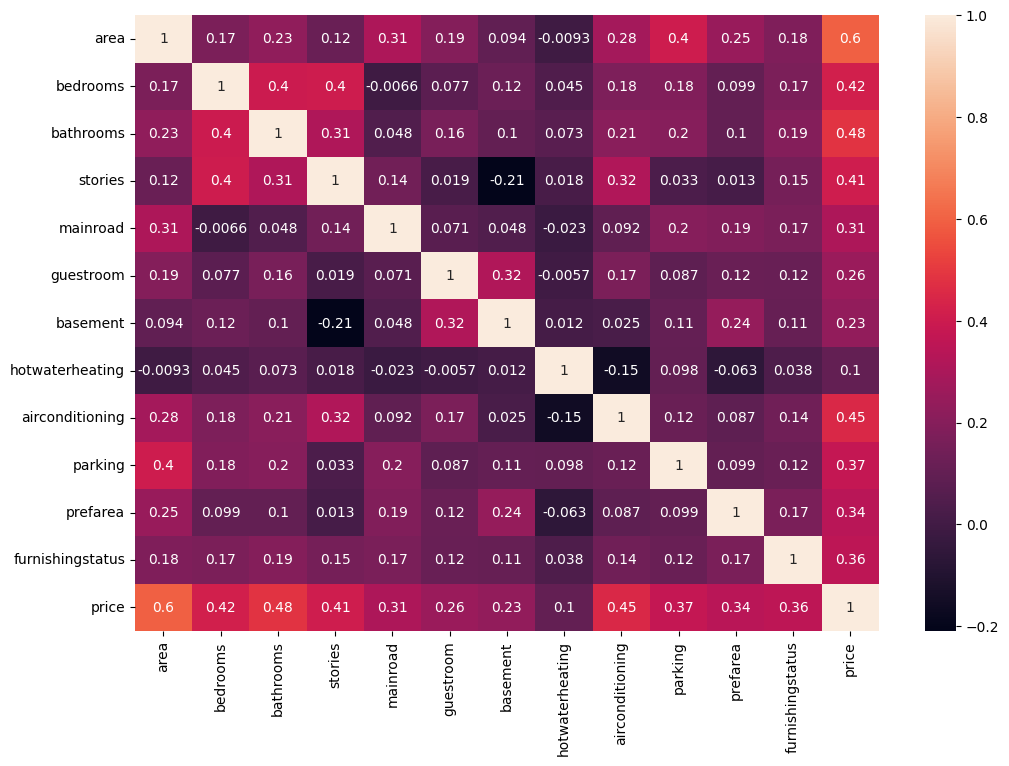

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [74]:

from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]



In [75]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9.190240,1.609438,2,2,1,1,0,0,0,2,0,1,15.473739
1,8.785845,1.609438,2,2,1,1,1,0,1,2,1,2,15.960272
2,8.166500,1.098612,1,2,1,0,0,0,0,0,1,2,15.322916
3,9.018090,1.386294,1,1,1,0,0,0,0,0,0,2,15.315134
4,8.064951,1.609438,1,2,1,0,1,0,1,0,0,0,15.006398


In [76]:
df.to_csv('C:/Users/Lenovo/Desktop/refined_projects/House-Price-Predictor/data/cleaned_train.csv', index=False)
df_v.to_csv('C:/Users/Lenovo/Desktop/refined_projects/House-Price-Predictor/data/cleaned_validation.csv', index=False)
df_t.to_csv('C:/Users/Lenovo/Desktop/refined_projects/House-Price-Predictor/data/cleaned_test.csv', index=False)
